### Import library


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Read the data for assignment


In [2]:
df = pd.read_csv('dataset.csv')

In [4]:
print(df.head(5))

                            uniq_id            crawl_timestamp  \
0  c2d766ca982eca8304150849735ffef9  2016-03-25 22:59:23 +0000   
1  7f7036a6d550aaa89d34c77bd39a5e48  2016-03-25 22:59:23 +0000   
2  f449ec65dcbc041b6ae5e6a32717d01b  2016-03-25 22:59:23 +0000   
3  0973b37acd0c664e3de26e97e5571454  2016-03-25 22:59:23 +0000   
4  bc940ea42ee6bef5ac7cea3fb5cfbee7  2016-03-25 22:59:23 +0000   

                                         product_url  \
0  http://www.flipkart.com/alisha-solid-women-s-c...   
1  http://www.flipkart.com/fabhomedecor-fabric-do...   
2  http://www.flipkart.com/aw-bellies/p/itmeh4grg...   
3  http://www.flipkart.com/alisha-solid-women-s-c...   
4  http://www.flipkart.com/sicons-all-purpose-arn...   

                            product_name  \
0    Alisha Solid Women's Cycling Shorts   
1    FabHomeDecor Fabric Double Sofa Bed   
2                             AW Bellies   
3    Alisha Solid Women's Cycling Shorts   
4  Sicons All Purpose Arnica Dog Shampoo   

 

Understanding the problem statement to proceed further in problem 


will try to clean the data to understand the features 

In [6]:
x=df.description.head(1)
print(x)

0    Key Features of Alisha Solid Women's Cycling S...
Name: description, dtype: object


Getting Information ablout the data set


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  bool   
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

In [27]:
print(df.description.())

0    Key Features of Alisha Solid Women's Cycling S...
1    FabHomeDecor Fabric Double Sofa Bed (Finish Co...
2    Key Features of AW Bellies Sandals Wedges Heel...
3    Key Features of Alisha Solid Women's Cycling S...
4    Specifications of Sicons All Purpose Arnica Do...
Name: description, dtype: object


In [3]:
df.describe(include= np.object)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,image,description,product_rating,overall_rating,brand,product_specifications
count,20000,20000,20000,20000,20000,20000,19997,19998,20000,20000,14136,19986
unique,20000,371,20000,12676,6466,19998,18589,17539,36,36,3499,18825
top,8d13cb7f8c0286efd61b24387e1067f0,2015-12-01 12:40:44 +0000,http://www.flipkart.com/noise-nosww028-round-d...,TheLostPuppy Back Cover for Apple iPad Air,"[""Jewellery >> Necklaces & Chains >> Necklaces""]",JEAEGE8Q8GXYFTGU,"[""http://img6a.flixcart.com/image/car-mat/m/t/...",TheLostPuppy Back Cover for Apple iPad Air (Mu...,No rating available,No rating available,Allure Auto,"{""product_specification""=>[{""key""=>""Type"", ""va..."
freq,1,1979,1,134,1567,2,45,92,18151,18151,469,71


In [4]:
df['description'][1]

"FabHomeDecor Fabric Double Sofa Bed (Finish Color - Leatherette Black Mechanism Type - Pull Out) Price: Rs. 22,646 • Fine deep seating experience • Save Space with the all new click clack Sofa Bed • Easy to fold and vice versa with simple click clack mechanism • Chrome legs with mango wood frame for long term durability • Double cushioned Sofa Bed to provide you with extra softness to make a fine seating experience • A double bed that can easily sleep two,Specifications of FabHomeDecor Fabric Double Sofa Bed (Finish Color - Leatherette Black Mechanism Type - Pull Out) Installation & Demo Installation & Demo Details Installation and demo for this product is done free of cost as part of this purchase. Our service partner will visit your location within 72 business hours from the delivery of the product. In The Box 1 Sofa Bed General Brand FabHomeDecor Mattress Included No Delivery Condition Knock Down Storage Included No Mechanism Type Pull Out Type Sofa Bed Style Contemporary & Modern 

In [14]:
df['product_category_tree'][:5]

0    ["Clothing >> Women's Clothing >> Lingerie, Sl...
1    ["Furniture >> Living Room Furniture >> Sofa B...
2    ["Footwear >> Women's Footwear >> Ballerinas >...
3    ["Clothing >> Women's Clothing >> Lingerie, Sl...
4    ["Pet Supplies >> Grooming >> Skin & Coat Care...
Name: product_category_tree, dtype: object

In [9]:
df['product_category_tree'].nunique()

6466

## Finding out the categories

In [35]:
#incoorect way to iterate in notebookcount = 0
for column in df[['product_category_tree']]:
    count = count + 2
    print(count)
    val =df[column]
    parts = val.values
    print("Part:", parts)
    print(len(parts))
    category_head = parts[0][2:]
    print("CH:", category_head)

NameError: name 'count' is not defined

In [12]:
from collections import Counter

In [37]:
mylist = list()
not_my_list =list()

19672
Counter({'clothing ': 6198, 'jewellery ': 3531, 'footwear ': 1227, 'mobiles & accessories ': 1099, 'automotive ': 1012, 'home decor & festive needs ': 929, 'beauty and personal care ': 710, 'home furnishing ': 700, 'kitchen & dining ': 647, 'computers ': 578, 'watches ': 530, 'baby care ': 483, 'tools & hardware ': 391, 'toys & school supplies ': 330, 'pens & stationery ': 313, 'bags, wallets & belts ': 265, 'furniture ': 180, 'sports & fitness ': 166, 'cameras & accessories ': 82, 'home improvement ': 81, 'health & personal care appliances ': 43, 'gaming ': 35, 'sunglasses ': 35, 'pet supplies ': 30, 'home & kitchen ': 24, 'home entertainment ': 19, 'ebooks ': 15, 'eyewear ': 10, 'household supplies ': 4, 'food & nutrition ': 2, 'wearable smart devices ': 2, 'automation & robotics ': 1})


<BarContainer object of 32 artists>

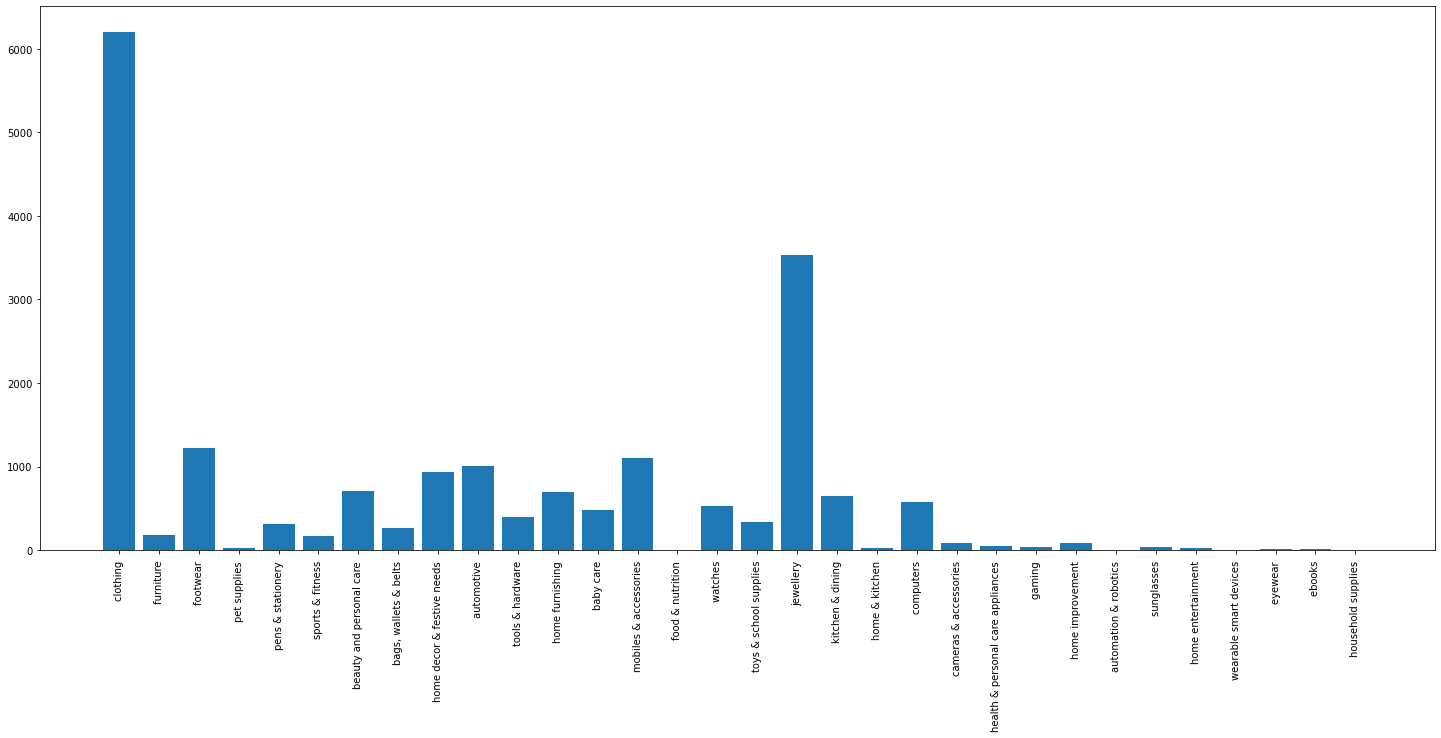

In [38]:
for index, row in df.iterrows():
    val=row['product_category_tree'].lower() 
    if(val.find('>>')!=-1):
        
        parts = val.split(">>")
        category_head=parts[0][2:]
        if(category_head[-1]==']'):
            category_head = category_head[:-2]
        mylist.append(category_head)
    else:
        not_my_list.append(val)
print(len(mylist))        
print(Counter(mylist))
product_count=Counter(mylist)
keys = product_count.keys()
values = product_count.values()
plt.xticks(rotation=90)
plt.rcParams['figure.figsize']=(25,10)
plt.bar(keys, values)

In [8]:
output = []
for x in mylist:
    if x not in output:
        output.append(x)
print(output)

['clothing ', 'furniture ', 'footwear ', 'pet supplies ', 'pens & stationery ', 'sports & fitness ', 'beauty and personal care ', 'bags, wallets & belts ', 'home decor & festive needs ', 'automotive ', 'tools & hardware ', 'home furnishing ', 'baby care ', 'mobiles & accessories ', 'food & nutrition ', 'watches ', 'toys & school supplies ', 'jewellery ', 'kitchen & dining ', 'home & kitchen ', 'computers ', 'cameras & accessories ', 'health & personal care appliances ', 'gaming ', 'home improvement ', 'automation & robotics ', 'sunglasses ', 'home entertainment ', 'wearable smart devices ', 'eyewear ', 'ebooks ', 'household supplies ']


### Above is list of major product categories 

In [15]:
print(len(not_my_list))

328


Will not use 328 entry for classifcation of products for instance 


In [16]:
print(len(output))

32


#### total number of  catergories to classify the product  is 32

In [53]:
#failed    for index, row in df['product_category_tree'].iterrows():
#failed   print(index,row)
s =  df['product_category_tree'][2440]
parts = s.split(">>")
print(parts) 
#slicing done
category_head=parts[0][2:]
#print(type(category_head ))
#category_head = re.sub(r"(\)", " ", category_head)
#category_head.replace('[', '')
print(category_head)


AttributeError: 'Series' object has no attribute 'iterrows'